# 决策树
decision tree决策树学习的算法通常是一个递归地选择最优特征，并根据该特征对训练数据进行分割，使得各个子数据集有一个最好的分类的过程。
### 基本思路：
1） 开始：构建根节点，将所有训练数据都放在根节点，选择一个最优特征，按着这一特征将训练数据集分割成子集，使得各个子集有一个在当前条件下最好的分类。
2） 如果这些子集已经能够被基本正确分类，那么构建叶节点，并将这些子集分到所对应的叶节点去。
3）如果还有子集不能够被正确的分类，那么就对这些子集选择新的最优特征，继续对其进行分割，构建相应的节点，如果递归进行，直至所有训练数据子集被基本正确的分类，或者没有合适的特征为止。
4）每个子集都被分到叶节点上，即都有了明确的类，这样就生成了一颗决策树。
### 特点
优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。
缺点：可能会产生过度匹配的问题
适用数据类型：数值型和标称型
### 创建分支的伪代码：  
createBranch()
    检测数据集中每个子项是否属于同一类：
        If so return 类标签：
        Else
             寻找划分数据集的最好特征
             划分数据集
             创建分支节点
                 for 每个划分的子集
                     调用函数createBranch()并增加返回结果到分支节点中#调用函数本身,递归 
                 return 分支节点

## 信息增益
划分数据集的大原则是：将无序数据变得更加有序
信息论是量化处理信息的分支科学，在划分数据集前后信息发生的变化称为信息增益
获得信息增益最高的特征就是最好的选择
集合信息的度量方式称为香农熵，或者简称熵。
熵定义为信息的期望值
为了计算熵，我们需要计算所有类别所有可能值所包含的信息期望值

### 具体计算公式
根据信息增益最大原则，选择最好的数据集划分方式
特征$A$对训练集$D$的信息增益$g(D,A)$，定义为集合$D$的经验熵$H(D)$与特征$A$给定条件下$D$的经验条件熵$H(D|A)$之差，即  
               $$g(D,A) = H(D) - H(D|A)$$
设训练数据集为$D$，$|D|$表示其样本容量，即样本个数。设有$K$个类$C_k$，$k=1,2,…,K$，$|C_k|$为属于类$C_k$的样本个数，$\sum_{k=1}^K|C_k|=|D|$。
设特征$A$有$n$个不同的取值${a_1,a_2,…,a_n}$，根据特征$A$的取值将$D$划分为$n$个子集$D_1,D_2,…,D_n$，$|D_i|$为$D_i$的样本个数，$\sum_{i=1}^n|D_i|=|D|$。  
记子集$D_i$中属于类$C_k$的样本的集合为$D_ik$，即$D_{ik}=D_i\bigcap C_k$，$|D_{ik}|$为$D_{ik}$的样本个数，于是信息增益的算法如下：  
输入：训练数据集$D$和特征$A$；  
输出：特征$A$对训练数据集$D$的信息增益$g(D,A)$。  
（1）计算数据集$D$的经验熵$H(D)$   
$$H(D) = -\sum_{k=1}^K\frac{|C_k|}{|D|}log_2\frac{|C_k|}{|D|}$$
（2）计算特征$A$对数据集$D$的经验条件熵$H(D|A)$
$$H(D|A) = \sum_{i=1}^n\frac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^n\frac{|D_i|}{|D|}\sum_{k=1}^K\frac{|D_{ik}|}{|D_i|}log_2\frac{|D_{ik}|}{|D_i|}$$
（3）计算信息增益
$$g(D,A) = H(D) - H(D|A)$$

**说明:**
将数据集文件 'lenses.txt' 放在当前文件夹

In [2]:
from math import log
import operator

In [3]:
## 熵的定义
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)                                               #计算实例的总数
    labelCounts = {}
    for featVec in dataSet:                                                 #逐行读取样本 #the the number of unique elements and their occurance
        currentLabel = featVec[-1]                                          # 当前样本类别
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1                                      # 统计每种类别出现的次数，保存为字典
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries                           # 每种类别出现的频率
        shannonEnt -= prob * log(prob, 2) #log base 2                       # 按香农公式计算香农熵
    return shannonEnt

In [4]:
## 划分数据集: 按照给定特征划分数据集
def splitDataSet(dataSet, axis, value):
    retDataSet = []                                                        # 初始化分割后的样本集为空
    for featVec in dataSet:                                                # 逐行读取样本
        if featVec[axis] == value:                                         # axis代表选取的特征列索引，value代表特征的某一取值
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting     # 取出特征列左侧的数据
            reducedFeatVec.extend(featVec[axis+1:])                                   # 合并特征列右侧的数据
            """
            返回值为一样本子集，样本数量（行数）与axis指向特征取值为value的样本子集（记为C）相同
            该样本子集是在上述样本子集C的基础上剔除掉axis指向特征取值为value的一列
            （exg：贷款申请样本集中，axis指向年龄，value代表青年，返回值即为包含青年的样本子集中
            剔除掉青年所在列后的样本集）
            """ 
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [5]:
## 选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                       # 特征数量
    baseEntropy = calcShannonEnt(dataSet)                   # 基础熵为样本集本身的香农熵
    bestInfoGain = 0.0; bestFeature = -1                    # 初始化最大信息增益为0；最佳特征索引为-1
    for i in range(numFeatures):                            # 遍历所有特征
        featList = [example[i] for example in dataSet]      # 取出第i个特征列数据
        uniqueVals = set(featList)                          # 第i个特征列的取值集合（集合类型特征值互不相同）
        newEntropy = 0.0                                    # 初始化当前特征香农熵为0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)    # 利用当前特征的每个取值分割样本集
            prob = len(subDataSet)/float(len(dataSet))      # 当前样本子集在全体样本集中的占比
            newEntropy += prob * calcShannonEnt(subDataSet) # 当前样本子集的香农熵
        infoGain = baseEntropy - newEntropy                 # 计算信息增益
        if (infoGain > bestInfoGain):                       # 与历史最大信息增益比较
            bestInfoGain = infoGain                         # 更新最大信息增益
            bestFeature = i                                 # 更新最佳特征索引
    return bestFeature                                      # 返回最佳特征列索引

In [6]:
## 多数表决法决定该叶子节点的分类
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [7]:
## 递归构建决策树
def createTree(dataSet, labels):                           # labels为每个特征的名称/说明
    classList = [example[-1] for example in dataSet]       # 取出类别列
    if classList.count(classList[0]) == len(classList):    # 只有1个类别时停止分割，返回当前类别
        return classList[0]
    if len(dataSet[0]) == 1:                               # 当没有更多特征时停止分割，返回实例中数量最多的类
        return majorityCnt(classList)                  
    
    bestFeat = chooseBestFeatureToSplit(dataSet)            # 最佳特征对应的列号
    bestFeatLabel = labels[bestFeat]                        # 最佳特征名称/说明
    myTree = {bestFeatLabel:{}}                             # 嵌套创建树，初始化
    del(labels[bestFeat])                                   # 从特征名中删除掉已经选为最佳特征的
    featValues = [example[bestFeat] for example in dataSet] # 最佳特征数据列
    uniqueVals = set(featValues)                            # 最佳特征列的取值集合
    for value in uniqueVals:                                # 对最佳特征列的每一个取值进行迭代
        subLabels = labels[:]                               # 拷贝特征名，避免搞乱原有值
        """
        以下在以当前最佳特征为节点的下方递归构建树
        """
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [17]:
import matplotlib.pyplot as plt
import numpy as np
#图形设置
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle = "round4", fc = "0.8")
arrow_args = dict(arrowstyle = "<-")
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """
    绘制节点
    参数：
        nodeTxt -- 点的内容
        centerPt -- 中心点
        parentPt -- 父节点
        nodeType -- 点类型
    返回：
        无
    """
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, \
            xycoords = 'axes fraction', xytext = centerPt, \
            textcoords = 'axes fraction', va = "center", \
            ha = "center", bbox = nodeType, arrowprops = arrow_args)
def createPlot():
    """
    进行绘制
    参数：
        无
    返回：
        无
    """
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode('decisionNode', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('leafNode', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()
    
def plotMidText(cntrPt, parentPt, txtString):
    """
    绘制注释
    参数：
        cntrPt -- 中心点位置
        parentPt -- 父节点位置
        txtString -- 文本字符串
    返回：
        无
    """
    #绘制注释的坐标位置
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    #绘制注释
    createPlot.ax1.text(xMid, yMid, txtString)
def getNumLeafs(myTree):
    """
    获取叶节点的数目
    参数：
        myTree -- 决策树
    返回：
        numLeafs -- 叶节点的数目
    """
    #初始化叶节点的数目
    numLeafs = 0
    #根节点的类名称
    firstStr = list(myTree.keys())[0]
    #根节点对应的字典
    secondDict = myTree[firstStr]
    #遍历字典中的每一个关键词
    for key in list(secondDict.keys()):
        #如果关键词下存放的还是字典，说明不是叶节点
        if type(secondDict[key]).__name__ == 'dict':
            #递归调用函数，统计子节点中的叶节点数目
            numLeafs += getNumLeafs(secondDict[key])
        #是叶节点，计数器++
        else:
            numLeafs += 1
    return numLeafs
def getTreeDepth(myTree):
    """
    获得树的深度
    参数：
        myTree -- 决策树
    返回：
        maxDepth -- 树的深度
    """
    #初始化树的深度
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__ == 'dict':
            #深度 = 1 + 子树的深度
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1:{'flippers': \
                    {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': \
                    {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]
def plotTree(myTree, parentPt, nodeTxt):
    """
    绘制决策树
    参数：
        myTree -- 决策树
        parentPt -- 父节点位置
        nodeTxt -- 节点文本信息
    返回：
        无
    """
    #求树的叶节点数和层数
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + np.float(numLeafs)) / 2.0 \
             / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),\
                    cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD   
def createPlotTree(inTree):
    """
    进行绘制
    参数：
        inTree -- 决策树
    返回：
        无
    """
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    axprops = dict(xticks = [], yticks = [])
    createPlot.ax1 = plt.subplot(111, frameon = False, **axprops)
    plotTree.totalW = np.float(getNumLeafs(inTree))
    plotTree.totalD = np.float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

In [9]:
#使用决策树执行预测分类
def classify(inputTree, featLabels, testVec):   #输入已构造的决策树，特征标签列表，待预测特征值
    firstStr = list(inputTree)[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)      #index方法查找当前列表中第一个匹配firstStr变量的元素
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

## 使用决策树预测隐形眼镜类型

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'young': 'soft', 'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}}}, 'yes': {'prescript': {'hyper': {'age': {'young': 'hard', 'pre': 'no lenses', 'presbyopic': 'no lenses'}}, 'myope': 'hard'}}}}, 'reduced': 'no lenses'}}


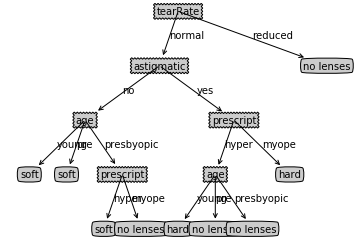

In [18]:
with open('lenses.txt') as fr:                      
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses,lensesLabels)      #生成决策树
print(lensesTree)
createPlotTree(lensesTree)                        #绘制决策树

In [19]:
## 使用决策树模型进行预测
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
classify(lensesTree, lensesLabels, lenses[0][:-1])    #对lenses数据集第一行数据进行预测


'no lenses'

In [20]:
#对 lenses 数据集所有数据进行决策树分类预测
preds = []
for i in range(len(lenses)):
    pred = classify(lensesTree, lensesLabels, lenses[i][:-1])
    preds.append(pred)
print(preds)

['no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses']
